In [18]:
import numpy as np
import scipy.signal as sg
from matplotlib import pyplot as plt
from collections import Counter

file = open("z3_1350V_x20.dat", "r")

def noise_level(file):
    '''Calculate noise level'''
    empty = False
    counter = Counter(dict())
    while(not empty):
        arr = np.fromfile(file, dtype=np.uint8, count=int(1e7))
        if(len(arr) < int(1e7)):
            empty = True
        unique, counts = np.unique(arr, return_counts = True)
        freqs = dict(zip(unique, counts))
        counter += Counter(freqs)
    return counter.most_common(1)[0][0]


def peaks_count(file):
    '''Count peaks'''
    empty = False
    peaks = 0
    while(not empty):
        arr = np.fromfile(file, dtype=np.uint8, count=int(1e7))
        peaks += len(sg.find_peaks(arr, height = np.median(arr)+np.std(arr), threshold=np.std(arr))[0])
        if(len(arr) < int(1e7)):
            empty = True
    return peaks

def histogram(file):
    '''Show histograrm'''
    counter = Counter(dict())
    
    empty = False
    
    while(not empty):
        arr = np.fromfile(file, dtype=np.uint8, count=int(1e8))
        if(len(arr) < int(1e8)):
            empty = True
        unique, counts = np.unique(arr, return_counts = True)
        freqs = dict(zip(unique, counts))
        counter += Counter(freqs)
        
    plt.bar(counter.keys(), counter.values())
    plt.show()

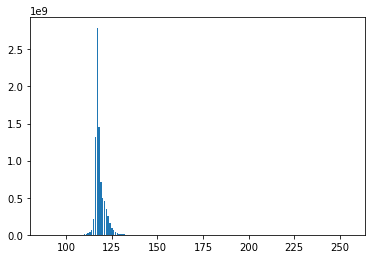

In [3]:
histogram(file)

In [12]:
noise_level(file)

117

In [19]:
peaks_count(file)

60